# COVID-19 PROJECT: Diagnosis using machine learning and MNR data

In [47]:
# Importing pandas library and dataset
import pandas as pd
dataset_df = pd.read_csv("C:/Users/User/Documents/PROJECTOS DATA SCIENCE/RMN/dataset.csv")
display(dataset_df.head())

,Unnamed: 0,Class,HMDB0000452,HMDB0000008,HMDB0000208,HMDB0000357,HMDB0000042,HMDB0000060,HMDB0001659,HMDB0000161,...,HMDB0000214,HMDB0000159,HMDB0000162,HMDB0000243,HMDB0000271,HMDB0000254,HMDB0000167,HMDB0000925,HMDB0000158,HMDB0000883
0,0,COVID-19,0.0,0.22,0.013,0.12,0.01,0.020,0.02,0.70,...,0.09,0.15,0.44,0.15,0.001,0.003,0.35,0.014,0.11,0.39
1,1,COVID-19,0.1,0.00,0.000,0.26,0.03,0.060,0.07,0.41,...,0.00,0.10,0.00,0.07,0.000,0.010,0.00,0.020,0.06,0.25
2,2,COVID-19,0.0,0.17,0.008,0.36,0.03,0.070,0.05,0.51,...,0.00,0.09,0.40,0.11,0.005,0.020,0.28,0.014,0.06,0.21
3,3,COVID-19,0.0,0.00,0.000,0.08,0.02,0.000,0.03,0.51,...,0.00,0.11,0.19,0.09,0.000,0.003,0.00,0.056,0.05,0.29
4,4,COVID-19,0.0,0.00,0.012,0.05,0.02,0.005,0.02,0.42,...,0.00,0.12,0.00,0.12,0.007,0.003,0.00,0.005,0.04,0.21


In [48]:
# Removing unnecessary column in dataframe
dataset_df = dataset_df.drop("Unnamed: 0", axis = 1)
# Removing K-EDTA column in dataframe
dataset_df = dataset_df.drop("K-EDTA", axis = 1)

In [49]:
display(dataset_df)

,Class,HMDB0000452,HMDB0000008,HMDB0000208,HMDB0000357,HMDB0000042,HMDB0000060,HMDB0001659,HMDB0000161,HMDB0000168,...,HMDB0000214,HMDB0000159,HMDB0000162,HMDB0000243,HMDB0000271,HMDB0000254,HMDB0000167,HMDB0000925,HMDB0000158,HMDB0000883
0,COVID-19,0.00,0.220,0.013,0.12,0.01,0.020,0.02,0.70,0.120,...,0.09,0.15,0.44,0.15,0.001,0.003,0.35,0.014,0.11,0.39
1,COVID-19,0.10,0.000,0.000,0.26,0.03,0.060,0.07,0.41,0.000,...,0.00,0.10,0.00,0.07,0.000,0.010,0.00,0.020,0.06,0.25
2,COVID-19,0.00,0.170,0.008,0.36,0.03,0.070,0.05,0.51,0.047,...,0.00,0.09,0.40,0.11,0.005,0.020,0.28,0.014,0.06,0.21
3,COVID-19,0.00,0.000,0.000,0.08,0.02,0.000,0.03,0.51,0.000,...,0.00,0.11,0.19,0.09,0.000,0.003,0.00,0.056,0.05,0.29
4,COVID-19,0.00,0.000,0.012,0.05,0.02,0.005,0.02,0.42,0.000,...,0.00,0.12,0.00,0.12,0.007,0.003,0.00,0.005,0.04,0.21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,Healthy,0.00,0.000,0.000,0.19,0.01,0.006,0.03,0.46,0.045,...,0.00,0.07,0.00,0.09,0.004,0.006,0.11,0.031,0.05,0.22
537,Healthy,0.13,0.000,0.013,0.14,0.04,0.050,0.07,0.38,0.050,...,0.15,0.09,0.30,0.06,0.004,0.009,0.00,0.031,0.07,0.34
538,Healthy,0.00,0.000,0.013,0.05,0.01,0.004,0.02,0.30,0.000,...,0.00,0.06,0.00,0.10,0.003,0.003,0.18,0.018,0.05,0.25
539,Healthy,0.00,0.004,0.000,0.00,0.03,0.009,0.01,0.46,0.000,...,0.00,0.07,0.38,0.04,0.002,0.003,0.14,0.002,0.08,0.28


In [50]:
# Importing packages for modelling
from pycaret import classification


In [51]:
# Doing classification setup
classification_setup = classification.setup(data = dataset_df, target = "Class")

,Description,Value
0,session_id,632
1,Target,Class
2,Target Type,Binary
3,Label Encoded,"COVID-19: 0, Healthy: 1"
4,Original Data,"(541, 41)"
5,Missing Values,False
6,Numeric Features,39
7,Categorical Features,1
8,Ordinal Features,False
9,High Cardinality Features,False


In [61]:
# Training several models
best = classification.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9762,0.9957,0.9781,0.9739,0.9752,0.9524,0.9538,0.3780
et,Extra Trees Classifier,0.9761,0.9978,0.9892,0.9637,0.9759,0.9522,0.9531,0.3620
lightgbm,Light Gradient Boosting Machine,0.9656,0.9952,0.9670,0.9634,0.9644,0.9312,0.9326,0.0820
lda,Linear Discriminant Analysis,0.9631,0.9861,1.0000,0.9330,0.9644,0.9263,0.9306,0.0220
gbc,Gradient Boosting Classifier,0.9603,0.9865,0.9725,0.9479,0.9593,0.9205,0.9222,0.1600
qda,Quadratic Discriminant Analysis,0.9524,0.9894,0.9614,0.9427,0.9513,0.9047,0.9062,0.0220
ada,Ada Boost Classifier,0.9524,0.9919,0.9506,0.9525,0.9505,0.9047,0.9064,0.1020
dt,Decision Tree Classifier,0.9339,0.9344,0.9503,0.9179,0.9329,0.8678,0.8698,0.0230
ridge,Ridge Classifier,0.9285,0.0000,0.9836,0.8861,0.9313,0.8575,0.8646,0.0120
nb,Naive Bayes,0.9232,0.9870,0.9670,0.8866,0.9240,0.8466,0.8519,0.0140


In [62]:
# The Random forest was the best one. Now, We will create the RF model
classification_rf = classification.create_model("rf")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9737,1.0000,0.9474,1.0000,0.9730,0.9474,0.9487
1,0.9737,1.0000,1.0000,0.9500,0.9744,0.9474,0.9487
2,0.9737,1.0000,1.0000,0.9474,0.9730,0.9474,0.9487
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,0.9737,0.9833,1.0000,0.9474,0.9730,0.9474,0.9487
5,0.9737,0.9819,1.0000,0.9474,0.9730,0.9474,0.9487
6,0.9737,1.0000,0.9444,1.0000,0.9714,0.9471,0.9484
7,0.9474,0.9972,0.8889,1.0000,0.9412,0.8939,0.8989
8,0.9730,0.9942,1.0000,0.9474,0.9730,0.9460,0.9474


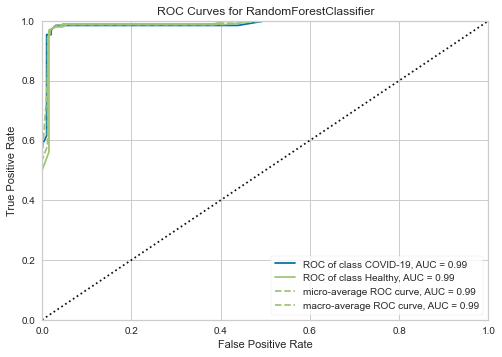

In [63]:
# Ploting AUC ROC for RF model
classification.plot_model(classification_rf, plot ="auc")

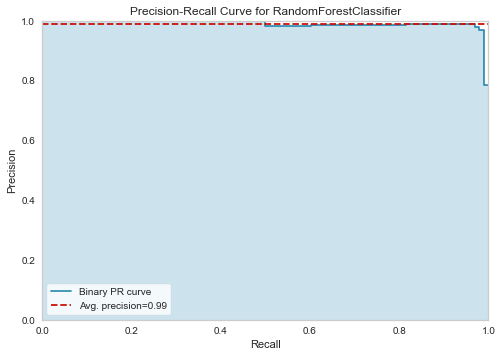

In [64]:
# Ploting: Precision recall
classification.plot_model(classification_rf, plot ="pr")

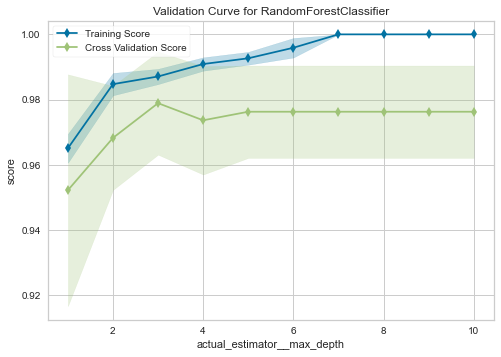

In [65]:
# Ploting: Validation curve
classification.plot_model(classification_rf, plot ="vc")

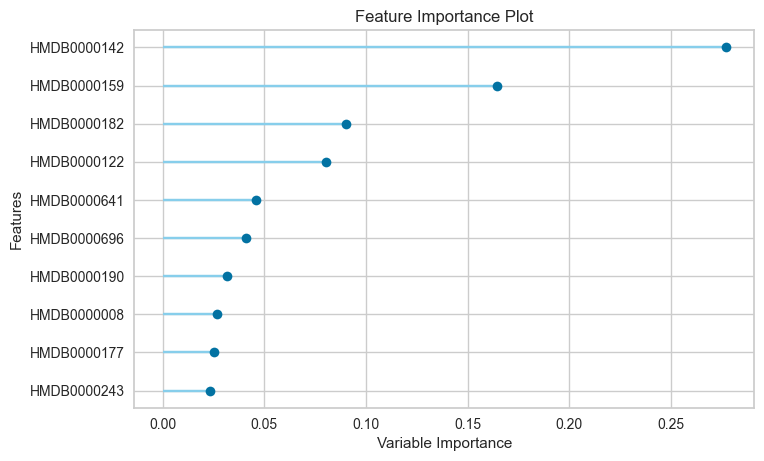

In [58]:
# Ploting: feature importence
classification.plot_model(classification_rf, plot ="feature")

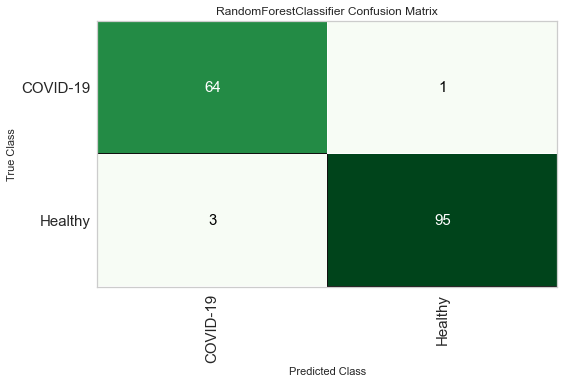

In [67]:
# Ploting: matrix confusion
classification.plot_model(classification_rf, plot ="confusion_matrix")

In [68]:
# General evaluation
classification.evaluate_model(classification_rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [70]:
# Saving Model
classification.save_model(classification_rf, "Random forest_best")

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='Class',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strate...
                  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                         class_weight=None, criterion='gini',
                                         max_depth=None, max_features='auto',
                                         max_l